In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("index.csv")
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
#Bundan sonraki adımlarda verimizi daha iyi tanımaya odaklanacağız

In [5]:
df.shape

(1313, 6)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1313.0,32.465788,5.227782,18.12,27.92,32.82,37.72,40.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1313 non-null   object 
 1   datetime     1313 non-null   object 
 2   cash_type    1313 non-null   object 
 3   card         1224 non-null   object 
 4   money        1313 non-null   float64
 5   coffee_name  1313 non-null   object 
dtypes: float64(1), object(5)
memory usage: 61.7+ KB


In [8]:
## Card değişkeninde bazı eksik gözlemler görüyoruz incelemeye alalım

In [9]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [10]:
df[df.isnull().any(axis = 1)]

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.0,Americano with Milk


In [11]:
df[df.notnull().any(axis = 1)]

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1308,2024-08-17,2024-08-17 16:31:54.837,card,ANON-0000-0000-0277,23.02,Cortado
1309,2024-08-17,2024-08-17 16:33:48.977,card,ANON-0000-0000-0192,32.82,Latte
1310,2024-08-17,2024-08-17 18:48:58.852,card,ANON-0000-0000-0456,32.82,Cappuccino
1311,2024-08-17,2024-08-17 21:18:56.806,card,ANON-0000-0000-0040,27.92,Americano with Milk


In [12]:
## İncelememiz sonucunda buradaki card değişkenindeki eksikliğin yapısal bir olay olduğunu anlıyoruz
## bu yüzden veri setinden çıkarmıyoruz

### Veri setimizdeki "datetime" değişkenini ay gün tarih ve saat olarak ayıralım

In [14]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [15]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df['hour'] = df["datetime"].dt.hour
df

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,13
...,...,...,...,...,...,...,...,...,...
1308,2024-08-17,2024-08-17 16:31:54.837,card,ANON-0000-0000-0277,23.02,Cortado,8,17,16
1309,2024-08-17,2024-08-17 16:33:48.977,card,ANON-0000-0000-0192,32.82,Latte,8,17,16
1310,2024-08-17,2024-08-17 18:48:58.852,card,ANON-0000-0000-0456,32.82,Cappuccino,8,17,18
1311,2024-08-17,2024-08-17 21:18:56.806,card,ANON-0000-0000-0040,27.92,Americano with Milk,8,17,21


In [16]:
# Bu işlemi yapmamızın nedeni değişkenler arasındaki ilişkiyi incelerken daha detaylı ve sağlam sonuçlar elde etmek.

In [17]:
pd.DataFrame(df["coffee_name"].value_counts(normalize = True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,24.30
Latte,21.48
Cappuccino,16.91
Americano,14.09
Cortado,9.37
Hot Chocolate,6.02
Espresso,4.49
Cocoa,3.35


In [18]:
## En çok satılan kahvelerin Sütlü Americano ve Latte olduğunu görüyoruz

In [19]:
[df["date"].min(),df["date"].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-08-17 00:00:00')]

In [20]:
gelir_verisi = df.groupby(["coffee_name"]).sum(["money"]).reset_index().sort_values(by="money",
                                                                                   ascending = False)

Text(0.5, 0, 'Gelir')

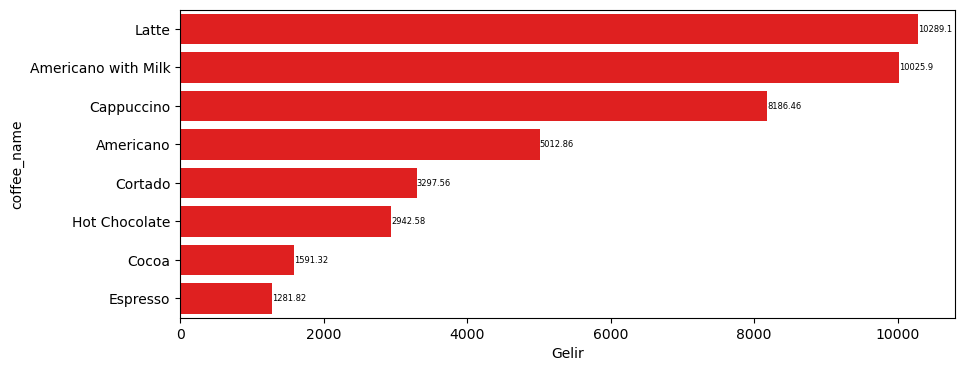

In [21]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data = gelir_verisi,x="money",y="coffee_name",color="red")
ax.bar_label(ax.containers[0],fontsize = 6)
plt.xlabel("Gelir")

In [22]:
aylik_satis = df.groupby(["coffee_name","month"]).count()["date"].reset_index().rename(columns={"date":"count"}).pivot(index = "month",
                                                                                                             columns="coffee_name",values="count").reset_index()

In [23]:
aylik_satis

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56
5,8,16,51,26,9,24,10,5,39


In [24]:
aylik_satis.describe().T.loc[:,["min","max"]]

,min,max
coffee_name,,
month,3.0,8.0
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,5.0,22.0
Latte,31.0,58.0


In [25]:
## Veriyi Görselleştirerek davranışını anlamaya çalışalım

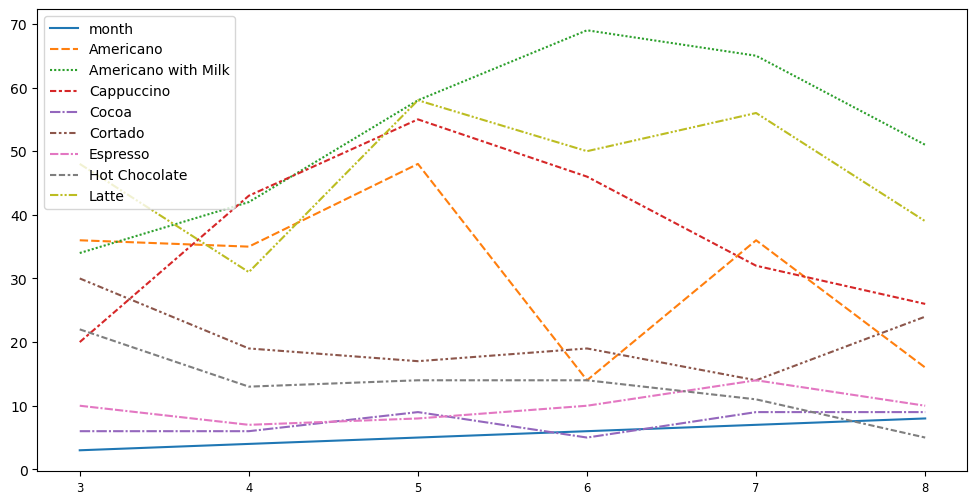

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(aylik_satis)
plt.legend(loc="upper left")
plt.xticks(range(len(aylik_satis["month"])),aylik_satis["month"],size="small");

In [27]:
saatlik_satis = df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
saatlik_satis


,hour,count
0,7,17
1,8,55
2,9,67
3,10,143
4,11,127
5,12,101
6,13,87
7,14,81
8,15,77
9,16,89


Text(0, 0.5, 'Satış Sayısı')

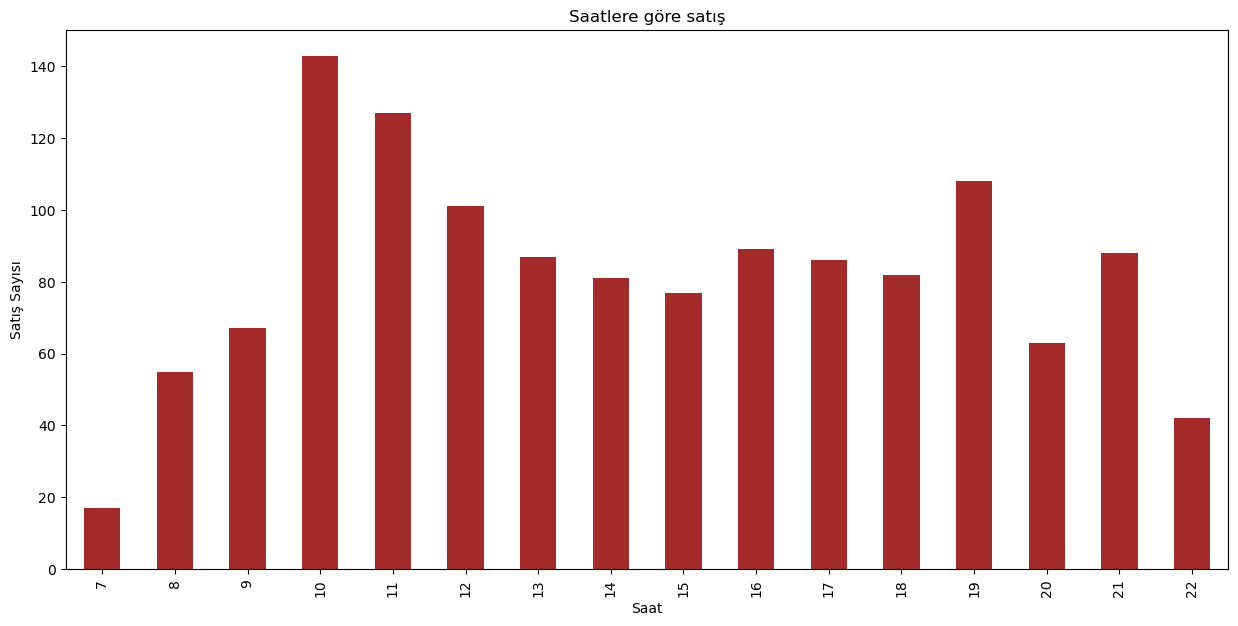

In [28]:
df.groupby("hour").size().plot(kind="bar",figsize=(15,7),color= "brown")
plt.title("Saatlere göre satış")
plt.xlabel("Saat")
plt.ylabel("Satış Sayısı")

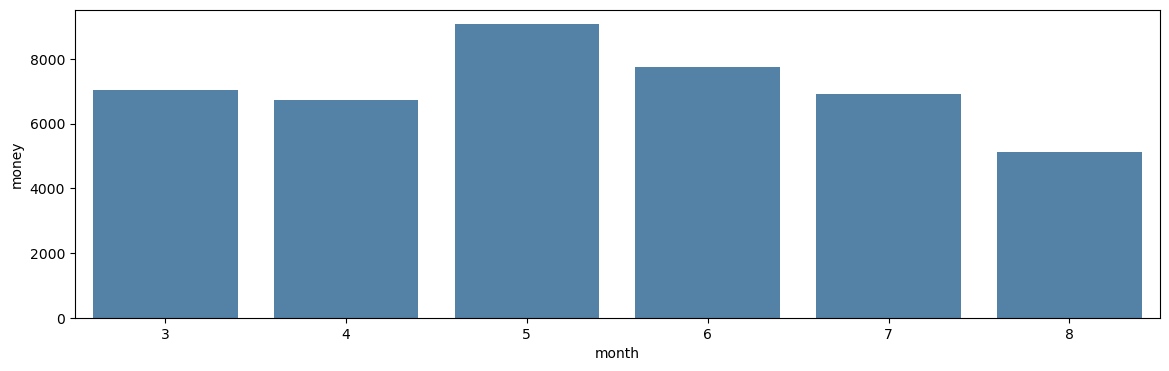

In [29]:
df_by_months = df.groupby("month").agg({"money":["sum","count"]}).reset_index()
df_by_months.columns = ["month","money","cups"]

plt.figure(figsize=(14,4))
sns.barplot(df_by_months,x="month",y="money",color="steelblue");

In [30]:
## Para akışına bakalım

In [31]:
date_range = pd.date_range(start = df["date"].min(),end = df["date"].max())
complete_dates = pd.DataFrame(date_range,columns=["date"])
df_by_date = df.groupby("date").agg({"money":["sum","count"]}).reset_index()
df_by_date.columns = ["date","money","cups"]
df_complete = pd.merge(complete_dates,df_by_date,on = "date", how="left")
df_complete.fillna(0,inplace= True)

(0.0, 683.004)

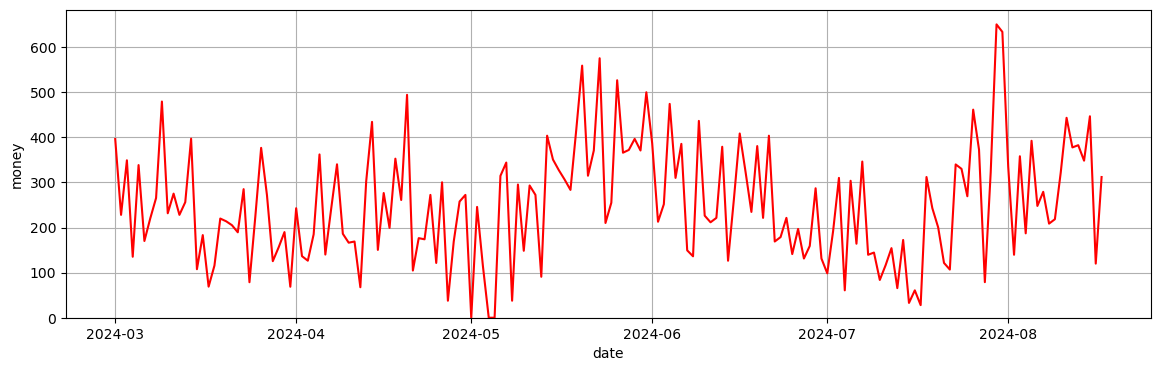

In [32]:
plt.figure(figsize=(14,4))
sns.lineplot(df_complete,x="date",y="money",color = "red")
plt.grid()
plt.ylim(0)

# Tahmin

In [65]:
df

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,13
...,...,...,...,...,...,...,...,...,...
1308,2024-08-17,2024-08-17 16:31:54.837,card,ANON-0000-0000-0277,23.02,Cortado,8,17,16
1309,2024-08-17,2024-08-17 16:33:48.977,card,ANON-0000-0000-0192,32.82,Latte,8,17,16
1310,2024-08-17,2024-08-17 18:48:58.852,card,ANON-0000-0000-0456,32.82,Cappuccino,8,17,18
1311,2024-08-17,2024-08-17 21:18:56.806,card,ANON-0000-0000-0040,27.92,Americano with Milk,8,17,21


In [80]:
df["money"].sum

<bound method Series.sum of 0       38.70
1       38.70
2       38.70
3       28.90
4       38.70
        ...  
1308    23.02
1309    32.82
1310    32.82
1311    27.92
1312    32.82
Name: money, Length: 1313, dtype: float64>

In [82]:
df["money"].mean()

32.465788271134805

In [86]:
## verilerimizle bir zaman serisi tahmini yapalım böylece gelecek sene verilerine bakalım

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [92]:
next_year_money = df["money"]

In [94]:
model = ARIMA(next_year_money,order=(5,1,0))
model = model.fit()

In [106]:
forecast = model.forecast(steps=12) 
print(forecast)

1313    30.066220
1314    29.692136
1315    30.960395
1316    30.729027
1317    30.370002
1318    30.770618
1319    30.475528
1320    30.472776
1321    30.620328
1322    30.576831
1323    30.548798
1324    30.579412
Name: predicted_mean, dtype: float64


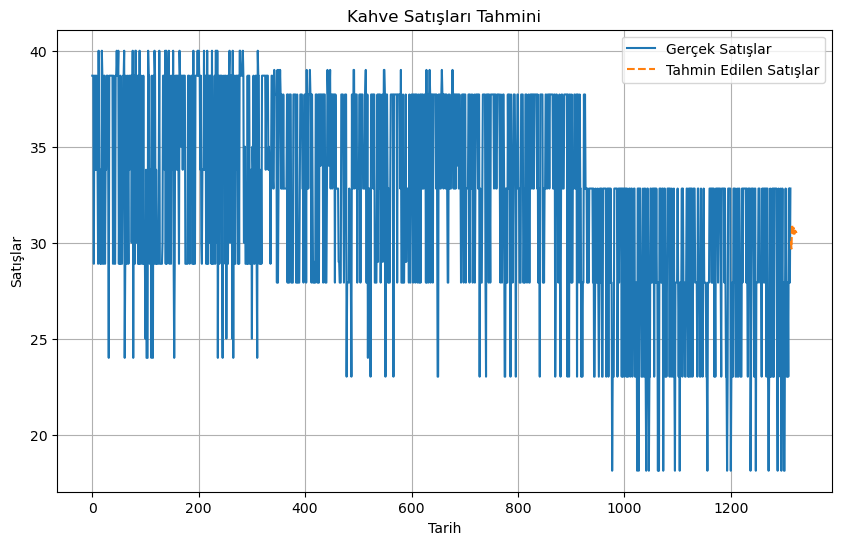

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(next_year_money, label='Gerçek Satışlar')
plt.plot(forecast, label='Tahmin Edilen Satışlar', linestyle='--')
plt.xlabel('Tarih')
plt.ylabel('Satışlar')
plt.title('Kahve Satışları Tahmini')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
# Hata oranımıza bakalım

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [116]:
y_true = next_year_money[-12:]
y_pred = model.predict(start=len(next_year_money)-12, end=len(next_year_money)-1)

In [118]:
mae = mean_absolute_error(y_true, y_pred)

In [120]:
mae

3.9827109722166334

In [122]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

In [124]:
rmse

4.510944787433196